In [3]:
import importlib
from hetgen import gen_training_data
importlib.reload(gen_training_data)

em_line = gen_training_data.EmissionLine(size= 100_000)

log_lum = em_line.draw_luminosity_func()
log_flux = em_line.draw_line_flux()


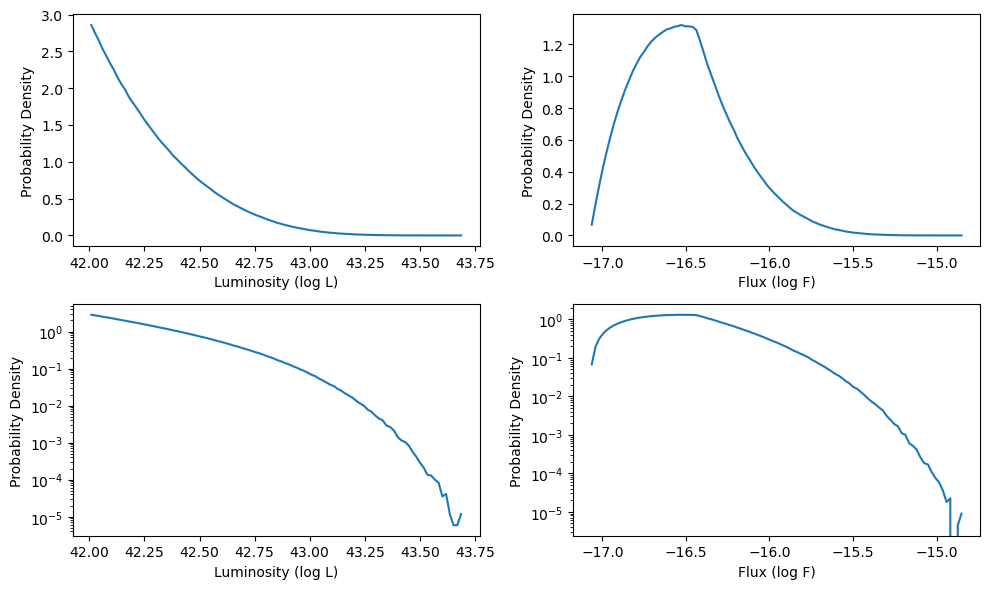

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,2,figsize=(10, 6))

hist, bin_edges = np.histogram(log_lum, bins=100, density=True)
mbins = 0.5 * (bin_edges[1:] + bin_edges[:-1])
ax[0,0].plot(mbins, hist, label='Luminosity Distribution')
ax[1,0].plot(mbins, hist, label='Luminosity Distribution')
ax[1,0].set_yscale('log')

hist, bin_edges = np.histogram(log_flux, bins=100, density=True)
mbins = 0.5 * (bin_edges[1:] + bin_edges[:-1])
ax[0,1].plot(mbins, hist, label='Flux Distribution')
ax[1,1].plot(mbins, hist, label='Flux Distribution')
ax[1,1].set_yscale('log')

for i in range(2):
    
    ax[i,0].set_xlabel('Luminosity (log L)')
    ax[i,0].set_ylabel('Probability Density')
    ax[i,1].set_xlabel('Flux (log F)')
    ax[i,1].set_ylabel('Probability Density')
fig.tight_layout()
#ax[0].set_yscale('log')
#ax[1].set_yscale('log')

Draw line profile and continuum:

In [ ]:
import importlib
from hetgen import gen_training_data
importlib.reload(gen_training_data)

em_line = gen_training_data.EmissionLine(size=10_000)


(0.0, 3e-17)

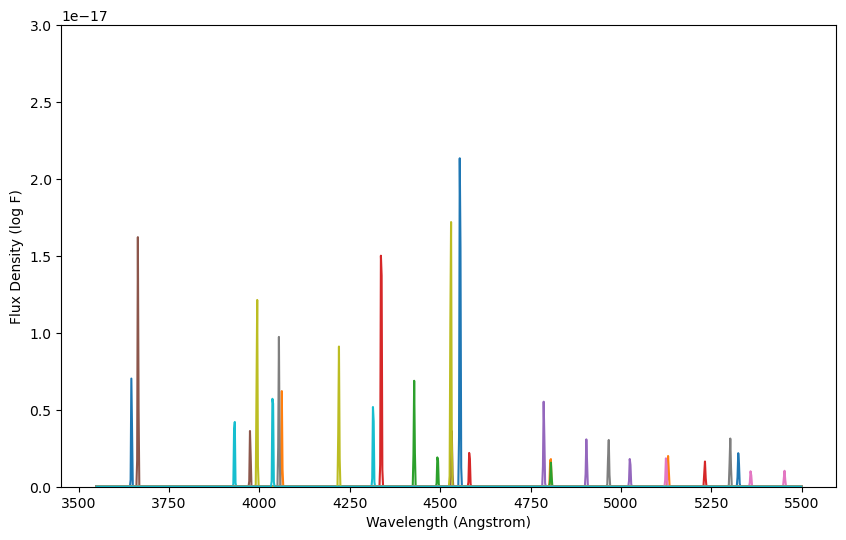

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1,figsize=(10, 6))
ind = np.random.choice(em_line.size, size=30, replace=False)
for i in ind:
    ax.plot(em_line.wave, 10**em_line.log_profile[i], label='Mock Spectrum')
ax.set_xlabel('Wavelength (Angstrom)')
ax.set_ylabel('Flux Density (log F)')
ax.set_ylim(0, 3e-17)

## Observed empty spectra:

FIX: Need to rteplace this with real e,pty fibers, now they are source spectra:

In [ ]:
import importlib
from hetgen import gen_training_data
importlib.reload(gen_training_data)

data_dir= '/home/qezlou/HD2/HETDEX/encoder/data/'
gen_training_data.FiberSpectra(data_dir)

## Full mock spectra:

In [10]:
import importlib
from os import path as op
from  hetgen import data
importlib.reload(data)

# Generate and save training data
data_dir= '/home/qezlou/HD2/HETDEX/encoder/data/'
output_file = op.join(data_dir, 'mock_spectra.h5')
mock_spec = data.MockSpectra(size=10, data_dir=data_dir)
mock_spec.save_spectra(output_file)


In [11]:
mock_spec.wave.shape

(1036,)

In [12]:
mock_spec = data.MockSpectra(size=10, data_dir=data_dir, output_file=output_file)

In [13]:
mock_spec.wave.shape, mock_spec

((1036,), <hetgen.data.MockSpectra at 0x7f9ca49a2970>)

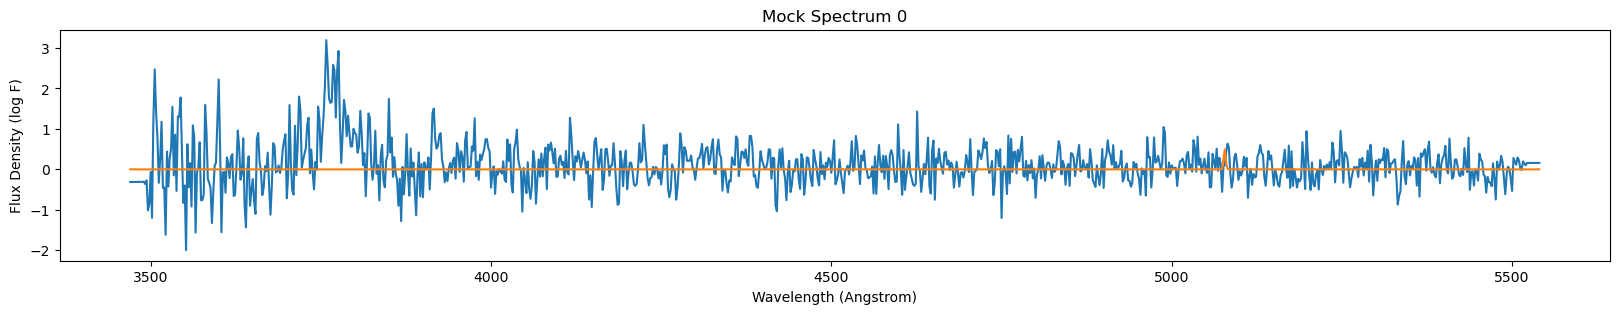

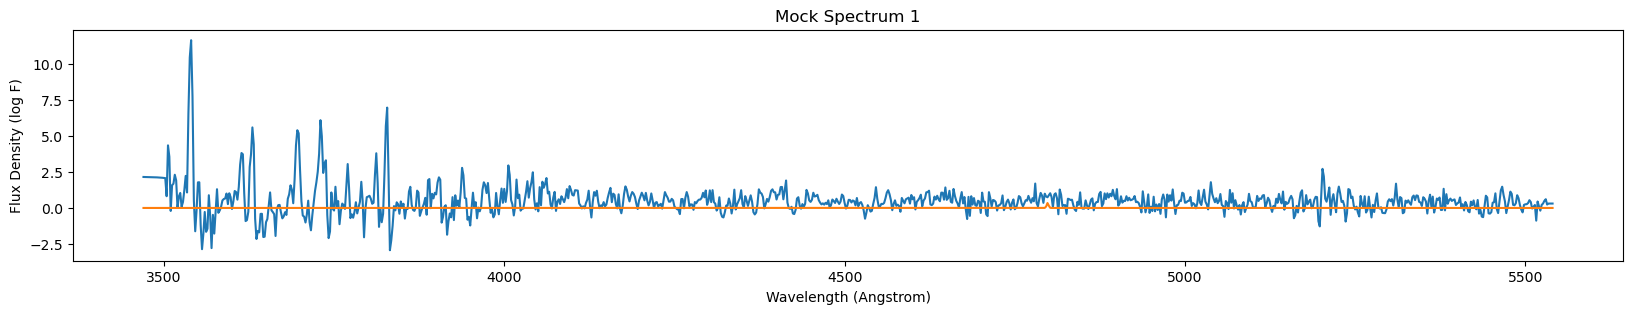

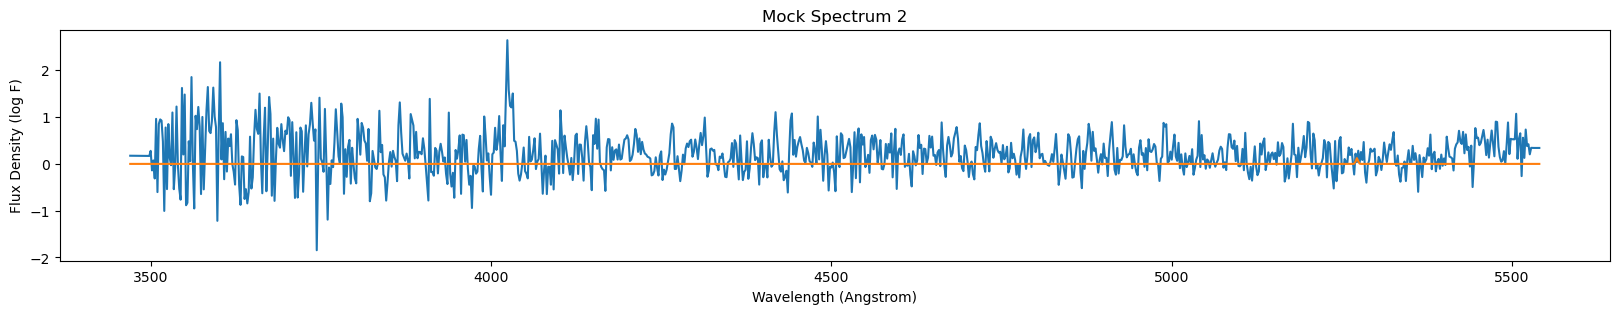

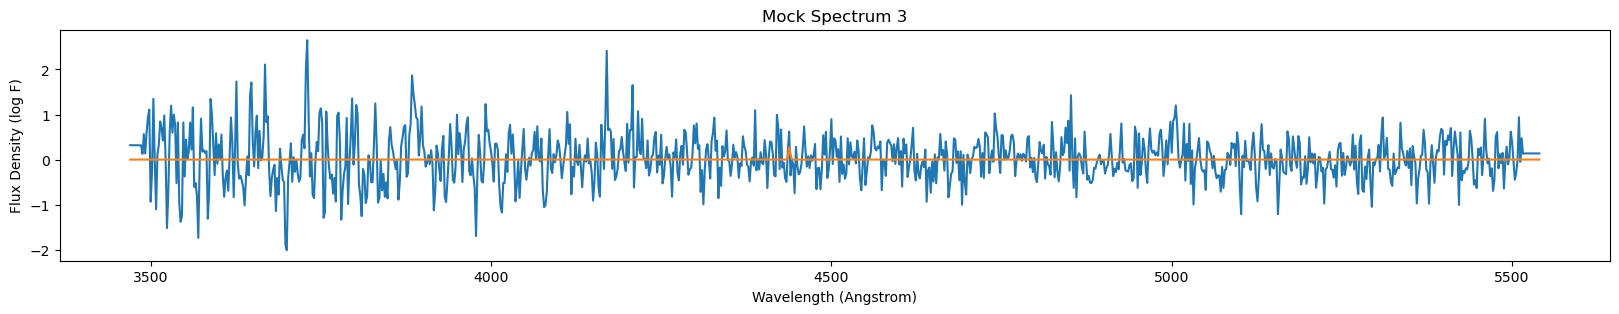

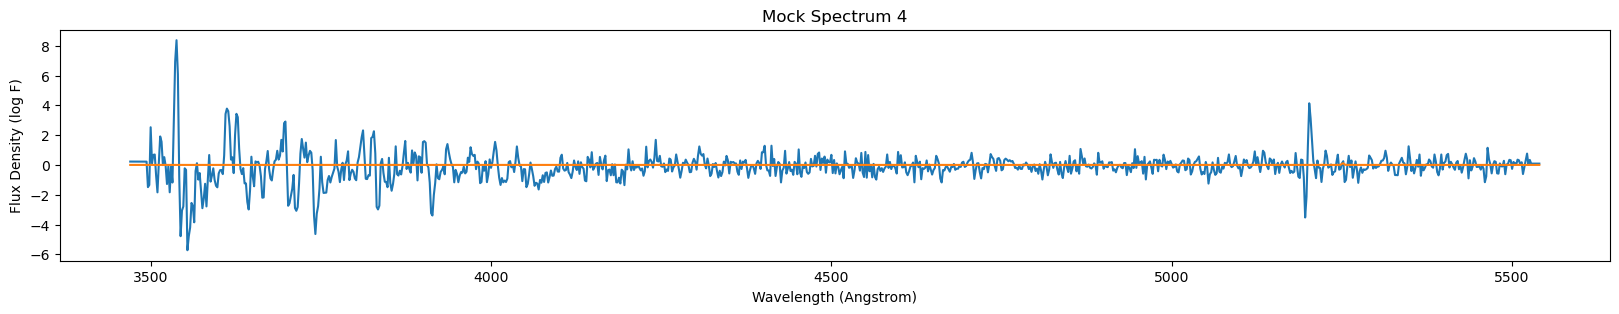

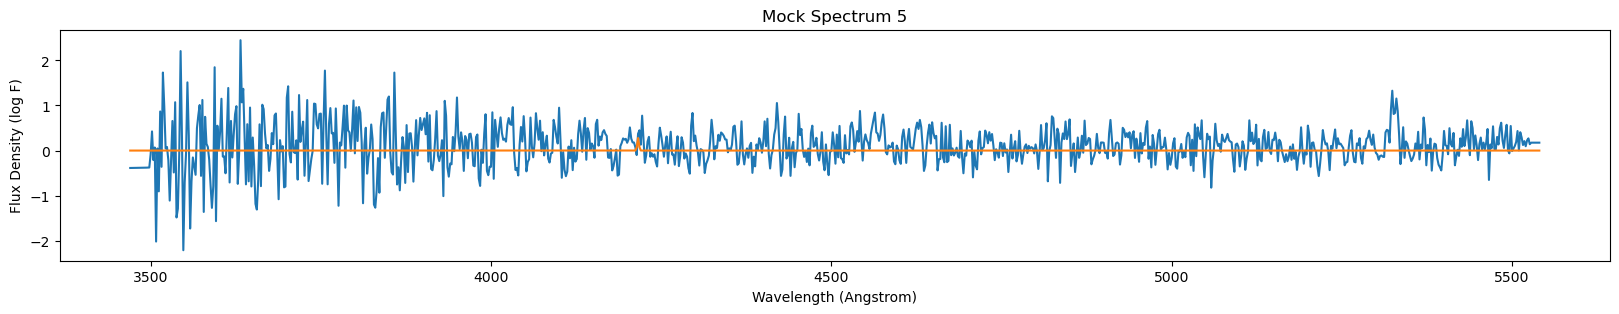

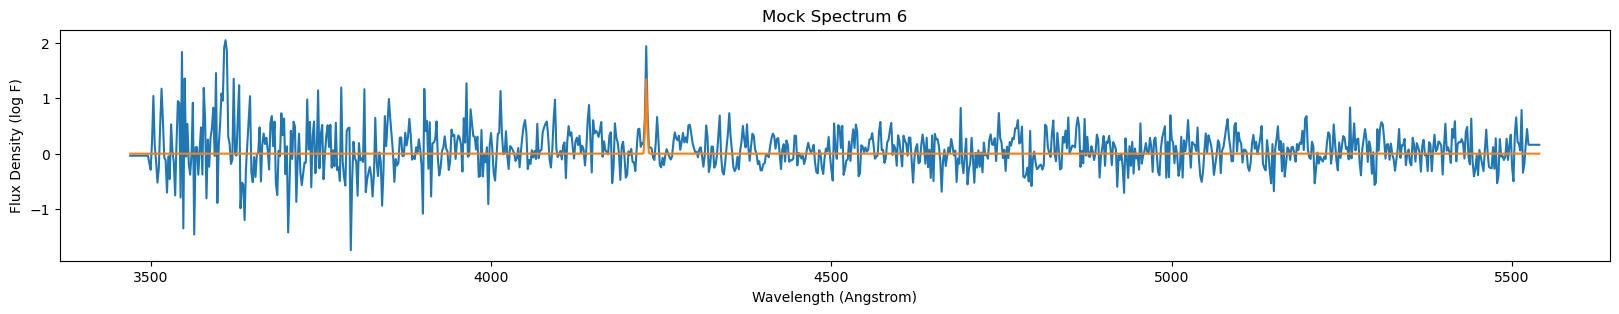

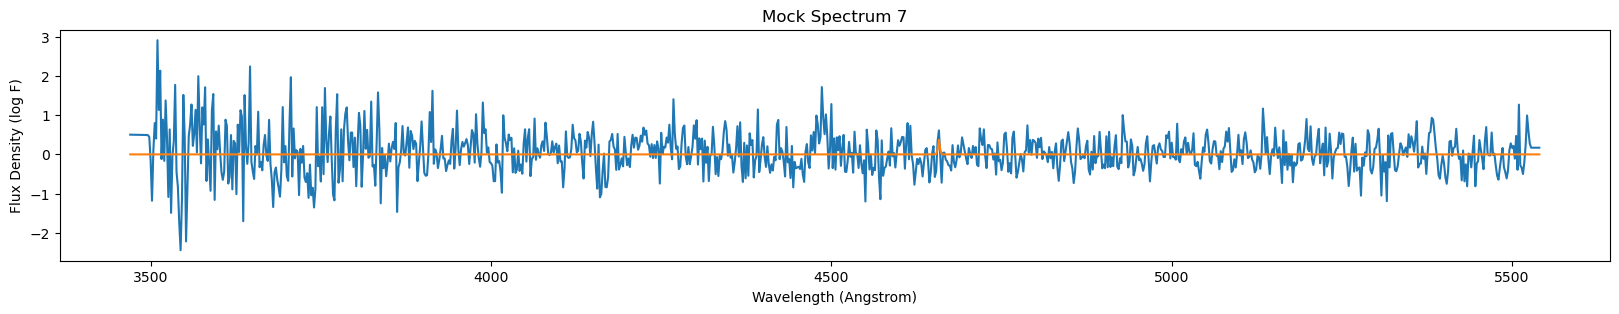

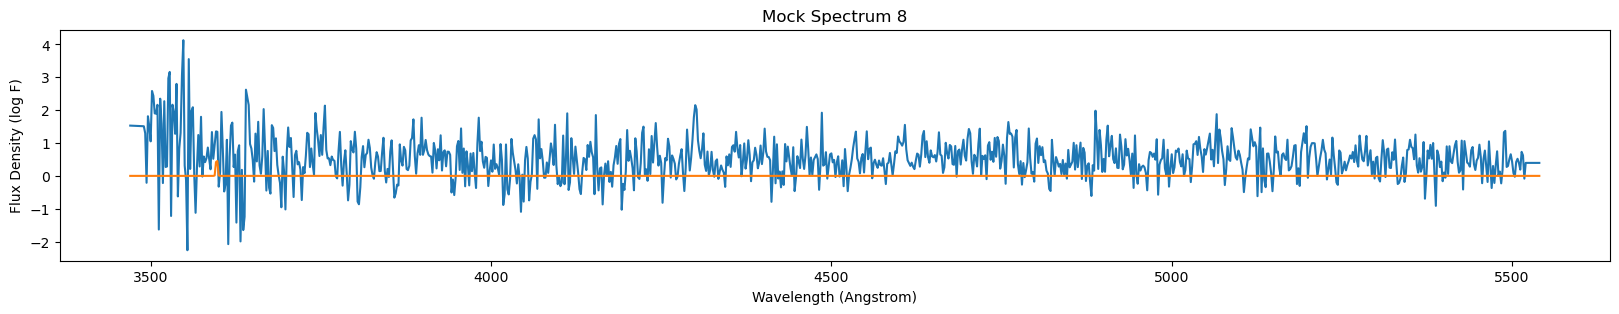

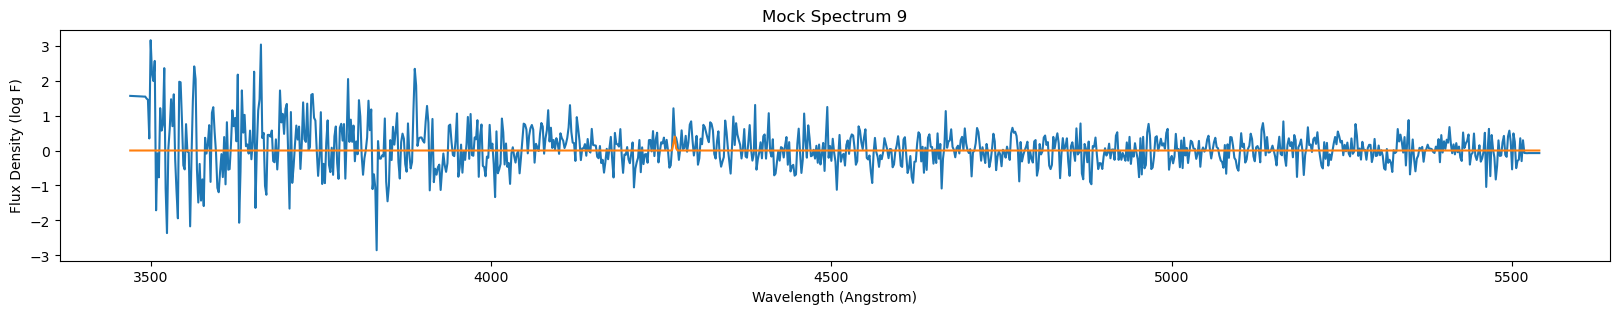

In [3]:
from matplotlib import pyplot as plt
for i in range(10):
    fig, ax = plt.subplots(1,1,figsize=(20, 3))
    ax.plot(mock_spec.wave, mock_spec.spec[i], label='Mock Spectrum')
    ax.plot(mock_spec.wave, mock_spec.emission_line.profile[i], label='Emission Line Profile')
    ax.set_title(f'Mock Spectrum {i}')
    ax.set_xlabel('Wavelength (Angstrom)')
    ax.set_ylabel('Flux Density (log F)')

The emission lines look so narrow and tiny!

## Train Val set:

In [2]:
from os import path as op
from hetgen.data import load_training_data

data_dir= '/home/qezlou/HD2/HETDEX/encoder/data/'
output_file = op.join(data_dir, 'mock_spectra.h5')
train, val = load_training_data(output_file=output_file)

train.shape, val.shape

((16, 1036), (4, 1036))